# process
- text analysis
- text transformation
- model deveploment
- ui deveploment

text analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk

In [3]:
#nltk.download('all')

In [4]:
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

In [5]:
emails = pd.read_csv('datasets/data.csv',encoding = 'latin1')
emails

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
emails.drop(labels = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1, inplace=True)
emails

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
emails.columns = ['category', 'text']
emails

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
emails.category.value_counts()

ham     4825
spam     747
Name: category, dtype: int64

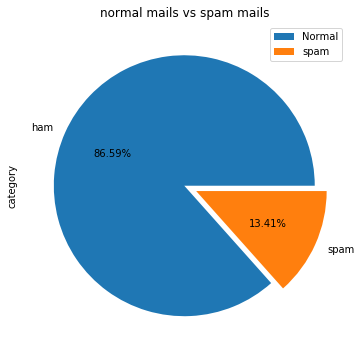

In [9]:
emails.category.value_counts().plot(kind = 'pie',
                                    explode = (0,.1),
                                    figsize = (6,6),
                                    autopct = '%.2f%%')
plt.title('normal mails vs spam mails')
plt.legend(['Normal','spam'])
plt.show()

In [10]:
spam_messages = emails[emails['category']== 'spam']['text']
ham_messages = emails[emails['category']== 'ham']['text']

In [11]:
spam_words = []
ham_words = []

In [12]:
def extract_spam_words(text):
    words = [w.lower() for w in word_tokenize(text) if w.lower() not in stopwords.words('english') and w.lower().isalpha()]
    spam_words.extend(words)

def extract_ham_words(text):
    words = [w.lower() for w in word_tokenize(text) if w.lower() not in stopwords.words('english') and w.lower().isalpha()]
    ham_words.extend(words)

In [13]:
spam_messages.apply(extract_spam_words)
print(spam_words[:100])

['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', 'freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv', 'winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'valid', 'hours', 'mobile', 'months', 'u', 'r', 'entitled', 'update', 'latest', 'colour', 'mobiles', 'camera', 'free', 'call', 'mobile', 'update', 'co', 'free', 'six', 'chances', 'win', 'cash', 'pounds', 'txt', 'send', 'cost', 'tsandcs', 'apply', 'reply', 'hl', 'info', 'urgent', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', 'c', 'lccltd', 'pobox', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'message']


In [14]:
ham_messages.apply(extract_ham_words)
print(ham_words[:100])

['go', 'jurong', 'point', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say', 'nah', 'think', 'goes', 'usf', 'lives', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent', 'per', 'request', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', 'copy', 'friends', 'callertune', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymore', 'tonight', 'k', 'cried', 'enough', 'today', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', 'granted', 'fulfil', 'promise', 'wonderful', 'blessing', 'times', 'date', 'sunday', 'oh', 'k', 'watching', 'eh', 'u', 'remember', 'spell', 'name', 'yes', 'v', 'naughty']


In [15]:
from wordcloud import WordCloud

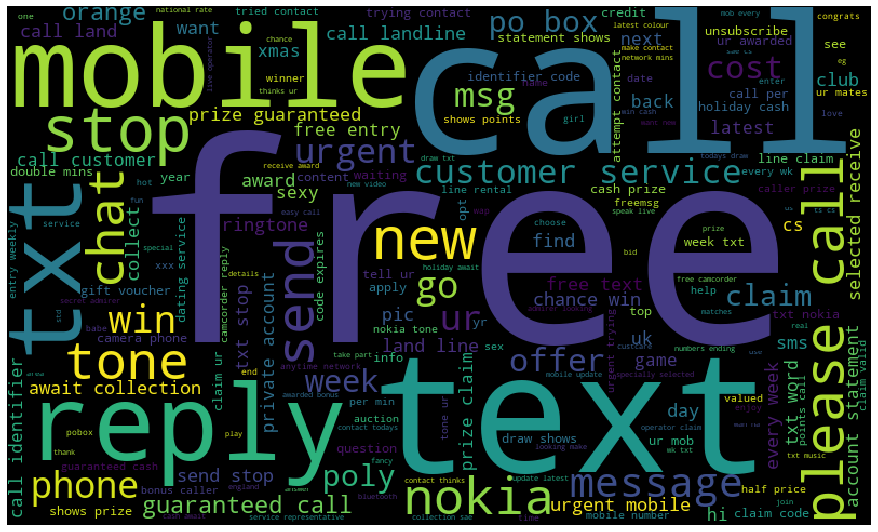

In [16]:
spam_wordcloud = WordCloud(width = 800, height=480).generate(" ".join(spam_words))
plt.figure(figsize=(12,8))
plt.axis('off')
plt.tight_layout(pad = 0)
plt.imshow(spam_wordcloud)
plt.show()

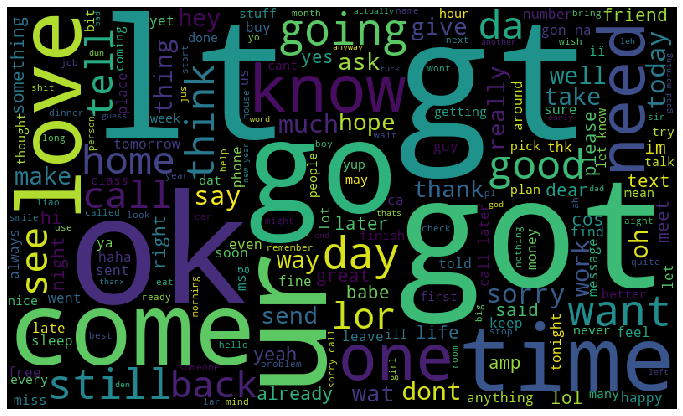

In [17]:
ham_wordcloud = WordCloud(width=800,height=480).generate(" ".join(ham_words))
plt.figure(figsize=(12,8))
plt.tight_layout(pad = 0)
plt.axis('off')
plt.imshow(ham_wordcloud)
plt.show()

#text transformation
- cleaning punctuations
- stopwords
- stemming

In [18]:
from nltk import SnowballStemmer

In [19]:
stemmer = SnowballStemmer('english')

In [20]:
def cleanup_text(message):
    message = message.translate(str.maketrans('','',string.punctuation))
    words = [stemmer.stem(w) for w in message.split() if w.lower() not in stopwords.words('english')]
    return ' '.join(words)

In [21]:
cleanup_text('tabish was playing outside, monish is working')

'tabish play outsid monish work'

In [22]:
emails.text = emails.text.apply(cleanup_text)

In [23]:
emails

,category,text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkts 2...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though
...,...,...
5567,spam,2nd time tri 2 contact u u å£750 pound prize 2...
5568,ham,ì b go esplanad fr home
5569,ham,piti mood soani suggest
5570,ham,guy bitch act like id interest buy someth els ...


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vec = TfidfVectorizer(encoding = 'latin1', strip_accents = 'unicode', stop_words = 'english')
feature = vec.fit_transform(emails.text)
feature.shape

(5572, 7903)

In [26]:
import pickle

In [27]:
with open('models/tfidf_vector.pkl','wb') as f:
    pickle.dump(vec,f)
print('done')

done


# model training

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [29]:
category_Encoder = LabelEncoder()
emails.category = category_Encoder.fit_transform(emails['category'])
emails

,category,text
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkts 2...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though
...,...,...
5567,1,2nd time tri 2 contact u u å£750 pound prize 2...
5568,0,ì b go esplanad fr home
5569,0,piti mood soani suggest
5570,0,guy bitch act like id interest buy someth els ...


In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(feature.toarray(), emails.category, test_size = 0.2)

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score

In [32]:
clf = GaussianNB()
clf.fit(Xtrain,ytrain)
clf.score(Xtest, ytest)*100

85.47085201793722

In [33]:
ypred = clf.predict(Xtest)

In [34]:
fbeta_score(ytest, ypred, beta= .5)

0.5036855036855037

In [35]:
confusion_matrix(ytest, ypred)

array([[830, 148],
       [ 14, 123]], dtype=int64)

In [36]:
with open('models/spam_classifier.pkl','wb') as f:
    pickle.dump(clf,f)
print('Done')

Done
